# Datenbereinigung und Transformation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./daten/spotify_dataset.csv', sep=",").drop('Index', axis = 1)
display(df.head())
df = df.dropna()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
import category_encoders as ce

# leere Werte löschen
df = df.drop([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538])

# lösche Zeilen ohne Genres
df = df[df.Genre != '[]']
print("Länge des Spotify Datensatztes", len(df))


#df columns dateype convert
df[['Artist Followers','Duration (ms)', 'Popularity']] = df[['Artist Followers', 'Duration (ms)', 'Popularity']].apply(pd.to_numeric)
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']] = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].astype('float')
df[['Song Name', 'Artist','Song ID', 'Chord']] = df[['Song Name', 'Artist','Song ID', 'Chord']].astype('string')


df['Duration(s)'] = df['Duration (ms)']/1000

#Streams in int umwandeln
df['Streams'] = df['Streams'].replace(',','', regex=True)
df['Streams'] = df['Streams'].astype('int64')

#devide the Date
df[['Start Highest Charting', 'End Highest Charting']]= df['Week of Highest Charting'].str.split('--', expand = True)

#add datatype Date
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Start Highest Charting'] = pd.to_datetime(df['Start Highest Charting'])
df['End Highest Charting'] = pd.to_datetime(df['End Highest Charting'])

df['Start Highest Charting'] = pd.to_numeric(df['Start Highest Charting'])
df['Release Date'] = pd.to_numeric(df['Release Date'])

Länge des Spotify Datensatztes 1470


In [4]:
df['Genre'] = df['Genre'].str.strip('[]')
genre_names = df['Genre'].str.split(',', expand=True)
genre_names = genre_names.fillna('NA')
genres_splitted = df['Genre'].str.split(',', expand=True)
enc = ce.OneHotEncoder(return_df=True, use_cat_names=True, drop_invariant=True)
genres_splitted_expand = enc.fit_transform(genres_splitted)

C:\Users\burak\anaconda3\lib\site-packages\category_encoders\one_hot.py:270: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(col, 1, inplace=True)


In [5]:
display(genres_splitted_expand)
# display(np.unique(df['Genre'].values))
# print(genre_names.values)
print(np.unique(genre_names.values))
# print(len(np.unique(genre_names.values)))

,0_'indie rock italiano',0_'australian hip hop',0_'pop',0_'lgbtq+ hip hop',0_'dance pop',0_'puerto rican pop',0_'latin',0_'k-pop',0_'canadian pop',0_'canadian contemporary r&b',...,7_ 'pop rap',7_ 'uk pop',7_ 'southern hip hop',8_ 'slap house',8_ 'yacht rock',8_ 'post-teen pop',8_ 'trap',9_ 'trance',9_ 'talent show',10_ 'tropical house'
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[" 'american folk revival'" " 'art rock'" " 'atl trap'"
 " 'australian pop'" " 'beatlesque'" " 'bedroom pop'"
 " 'brill building pop'" " 'britpop'" " 'brostep'"
 " 'canadian contemporary r&b'" " 'canadian pop'" " 'canadian trap'"
 " 'celtic punk'" " 'celtic rock'" " 'chicago indie'" " 'chicago rap'"
 " 'chill r&b'" " 'classic rock'" " 'classic soul'" " 'colombian pop'"
 " 'corrido'" " 'country road'" " 'country rock'" " 'country'"
 " 'dance pop'" " 'deep euro house'" " 'deep house'" " 'dmv rap'"
 " 'dominican pop'" " 'drill'" " 'dutch edm'" " 'easy listening'" " 'edm'"
 " 'electro house'" " 'electro latino'" " 'electronic trap'"
 " 'electropop'" " 'escape room'" " 'etherpop'" " 'eurodance'"
 " 'europop'" " 'folk punk'" " 'folk rock'" " 'folktronica'"
 " 'francoton'" " 'french hip hop'" " 'funk carioca'" " 'funk ostentacao'"
 " 'funk paulista'" " 'funk pop'" " 'funk'" " 'gangster rap'"
 " 'german dance'" " 'german drill'" " 'german hip hop'" " 'german pop'"
 " 'german techno'" " 'german

In [6]:
unq = np.unique(genre_names.values)
filt = unq[382]
display(genres_splitted_expand.filter(regex=f'{unq[382]}'))
display(genres_splitted_expand.filter(regex="'pop'"))
display(genres_splitted_expand.filter(regex=filt))

,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


In [7]:
genre_df = pd.DataFrame()
for indx, genre in enumerate(unq):
    filter_genre = genres_splitted_expand.filter(regex=genre)
    sum_columns = filter_genre.sum(axis=1)
    sum_columns.name = genre
    genre_df.insert(loc=indx, column=genre, value=sum_columns)
genre_df = genre_df.drop(columns=['NA'])

C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
display(genre_df.head())
print(type(genre_df[' \'art rock\''][0]))

,'american folk revival','art rock','atl trap','australian pop','beatlesque','bedroom pop','brill building pop','britpop','brostep','canadian contemporary r&b',...,'trap argentino','trap chileno','trap latino','trap queen','tropical house','uk hip hop','urbano espanol','venezuelan hip hop','viral rap','weirdcore'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'numpy.int64'>


In [9]:
pop = []
hiphop = []
rock = []
rap = []
electro = []
soul = []
house = []
indie = []
country = []
folk = []

for item in genre_df.columns:
    if 'pop' in item:
        pop.append(item)
    if 'hip hop' in item:
        hiphop.append(item)
    if 'rap' in item:
        rap.append(item)
    if 'rock' in item:
        rock.append(item)
    if 'metal' in item: #gehört zu Genre Rock
        rock.append(item)
    if 'electro' in item:
        electro.append(item)
    if 'drill' in item:
        electro.append(item)
    if 'soul' in item:
        soul.append(item)
    if 'funk' in item:
        soul.append(item)
    if 'house' in item:
        house.append(item)
    if 'indie' in item:
        indie.append(item)
    if 'country' in item:
        country.append(item)
    if 'country' in item:
        country.append(item)
        
print(len(pop) + len(hiphop) + len(rock) + len(rap) + len(electro) + len(soul) 
      + len(house) + len(indie) +len(country) + len(folk))


323


In [10]:
#pop_genre = pd.Dataframe(genre_df[filtered_pop.index].sum(axis = 1), columns = ['pop'])

df["pop"] = 0
df["hip hop"] = 0
df["rap"] = 0
df["rock"] = 0
df["electro"] = 0
df["soul"] = 0
df["house"] = 0
df["indie"] = 0
df["country"] = 0
df["folk"] = 0


for item in pop:
    df["pop"] = df["pop"] + genre_df[item]
for item in hiphop:
    df["hip hop"] = df["hip hop"] + genre_df[item]
for item in rap:
    df["rap"] = df["rap"] + genre_df[item]
for item in rock:
    df["rock"] = df["rock"] + genre_df[item]
for item in electro:
    df["electro"] = df["electro"] + genre_df[item]
for item in soul:
    df["soul"] = df["soul"] + genre_df[item]
for item in house:
    df["house"] = df["house"] + genre_df[item]
for item in indie:
    df["indie"] = df["indie"] + genre_df[item]
for item in country:
    df["country"] = df["country"] + genre_df[item]
for item in folk:
    df["folk"] = df["folk"] + genre_df[item]



In [ ]:
df

In [11]:
df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]] = np.where(df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]] > 1, 1, df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]])

In [12]:
#Dummy variablen
# encoder = ce.OneHotEncoder(cols=['Genre'], handle_unknown='return_nan', return_df=True, use_cat_names=True)
# df_final = encoder.fit_transform(df)

df_final = df.copy()
df_final.drop(['Streams', 'Song ID', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre'], inplace=True, axis=1)

In [13]:
#Normaliserung der Daten
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

scaler.fit(df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date', 'Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])
df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']] = scaler.transform(df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])

In [14]:
display(df_final.head())
print(df_final.columns)
print(df_final.info())

,Highest Charting Position,Number of Times Charted,Song Name,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,...,pop,hip hop,rap,rock,electro,soul,house,indie,country,folk
0,0.000000,0.049645,Beggin',Måneskin,0.040475,0.954109,100,0.714,0.800,0.763187,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.005025,0.014184,STAY (with Justin Bieber),The Kid LAROI,0.026702,0.999140,99,0.591,0.764,0.737844,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.070922,good 4 u,Olivia Rodrigo,0.075140,0.997454,99,0.563,0.664,0.754339,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010050,0.028369,Bad Habits,Ed Sheeran,0.999467,0.998658,98,0.808,0.897,0.804274,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020101,0.000000,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,0.065625,0.999622,96,0.736,0.704,0.665679,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['Highest Charting Position', 'Number of Times Charted', 'Song Name',
       'Artist', 'Artist Followers', 'Release Date', 'Popularity',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Valence', 'Chord', 'Duration(s)',
       'Start Highest Charting', 'pop', 'hip hop', 'rap', 'rock', 'electro',
       'soul', 'house', 'indie', 'country', 'folk'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1555
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1470 non-null   float64
 1   Number of Times Charted    1470 non-null   float64
 2   Song Name                  1470 non-null   string 
 3   Artist                     1470 non-null   string 
 4   Artist Followers           1470 non-null   float64
 5   Release Date               1470 non-null   float64
 6   Popula

In [17]:
#Remove high correlated variables
#nicht ausführen, FALLS NÖTIG
df_o = df_final.copy()
df_o.drop(['Song Name', 'Artist', 'Chord'], inplace=True, axis=1)
df_corr = df_o.corr()

threshold = 0.95

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_o.columns[columns]
selected_columns
df_final = df_o[selected_columns]
print(selected_columns)

Index(['Highest Charting Position', 'Number of Times Charted',
       'Artist Followers', 'Release Date', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Valence', 'Duration(s)', 'Start Highest Charting', 'pop',
       'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
       'country', 'folk'],
      dtype='object')


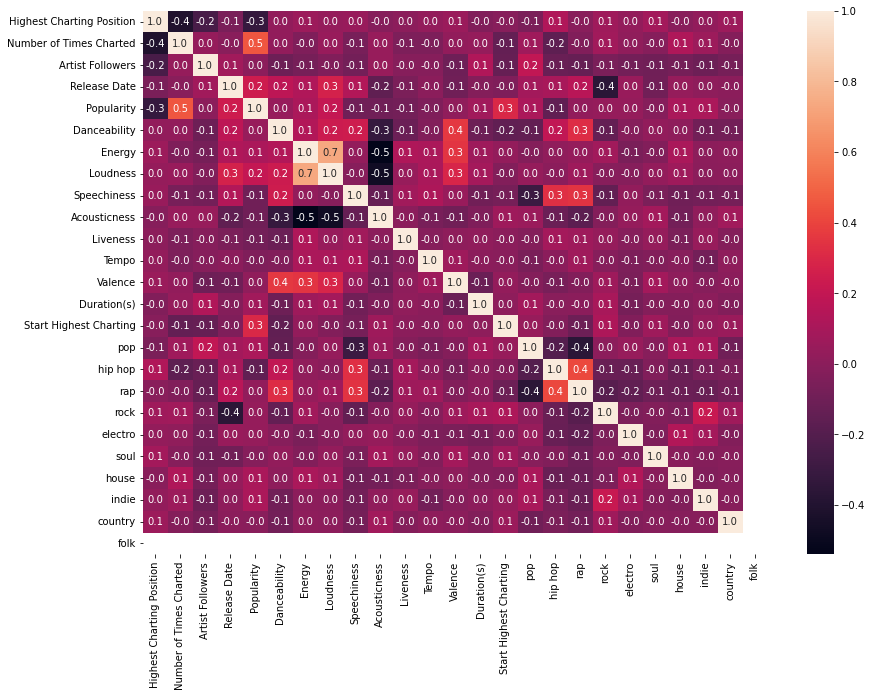

In [16]:
%matplotlib inline
 
#Korrelation's plot
df_o = df_final.copy()

df_o.drop(['Song Name', 'Artist', 'Chord'], inplace=True, axis=1)
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_o.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [ ]:
len(selected_columns)
print()

In [ ]:
df_final

In [ ]:
print(genre_df[' \'pop\''].sum())
genres_occurences = genre_df.sum()
np_histogram = np.histogram(genres_occurences)
display(genres_occurences)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
plt.hist(genres_occurences, bins=len(genres_occurences))
plt.show()

In [ ]:
genres_1_occurence = genres_occurences[genres_occurences == 5]
filtered_pop = genres_occurences.filter(regex='pop')

In [ ]:
# display(genres_1_occurence)
# print(len(genres_1_occurence))
# print(genres_1_occurence.index)
# display(filtered_pop)
# display(filtered_pop)
plt.figure(figsize=(30, 15))
plt.hist(filtered_pop, bins=len(filtered_pop))
plt.show()

In [ ]:
genre_df_transformation_test_1 = genre_df[filtered_pop.index].copy()
genre_df_transformation_test_1['\'pop\''] = np.where(genre_df_transformation_test_1[filtered_pop.index] == 1, 1, 0)

In [ ]:
hwufwrgh = genre_df_transformation_test_1[filtered_pop.index].copy()
for g in filtered_pop.index:
    hwufwrgh['\'pop\''] = np.where(hwufwrgh[f'{g}'] == 1, 1, 0)
hwufwrgh['\'pop\'']